# Modelo de Regresión logística

Es una adaptación del perceptron. El perceptron es muy bueno cuando las clases se pueden seperar por un hiperplano. (Es es muy inocente, la mayoria de los problemas no se van a separar de esa forma)

Usando la probabilida condicional podia mejorar el perceptron. Lo que hace es tratar de encontrar el logaritmo de la probabilidad de la clase $1$ dado un conjunto de datos.

Pero al tomar la inversa de esa logaritmo, encontramos una funcion bastante interesante llamada __sigmoide__.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoide
def sigmoide(z):
    return 1.0/(1 + np.exp(-z))

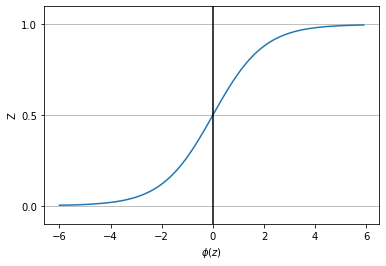

In [3]:
z = np.arange(-6, 6, 0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
# Mas componente a nuestra agrafica
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)

plt.xlabel('$\phi (z)$')
plt.ylabel('Z')

plt.yticks([0.0, 0.5, 1])

ax = plt.gca()
ax.yaxis.grid(True)

plt.show()

### Obtencion de nuestro datos

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Cargamos nuestros datos
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]   # petal length y petal width
y = iris.target[:]         # Las clases de las flores


# Dividir nuestros datos de entramiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)
# Standarizar nuestros datos
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Metodo de regresion logistica

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

Acerca del parametro `C=100.0`:
https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul

In [6]:
y_pred = lr.predict(X_test_std)
print("Errores  :", (y_test - y_pred).sum())
print("Exactitud:", lr.score(X_test_std, y_test))

Errores  : 1
Exactitud: 0.9777777777777777


### Graficando nuestro modelo

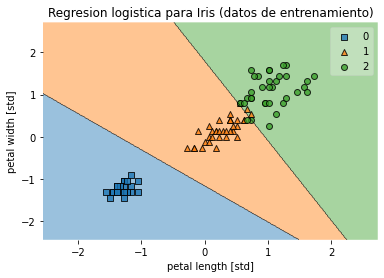

In [7]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_train_std, y_train, clf=lr)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.title("Regresion logistica para Iris (datos de entrenamiento)")
plt.show()

Una de las diferencias son las rectas, busca areas cambiando la forma de los datos. Primero separa la linea de los azul, luego con la de los narangas y al final los de los verdes.

- Fue gracias de haber metido la sigmoide al perceptron, para cambias las pendientes de esas rectas.

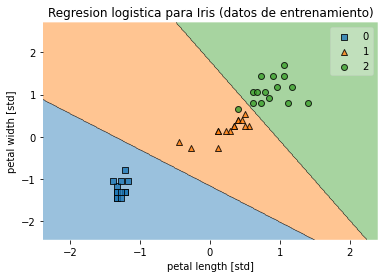

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_test_std, y_test, clf=lr)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.title("Regresion logistica para Iris (datos de entrenamiento)")
plt.show()

## Conjuntos de datos que no son lineales

La regresión logistica tambien nos ayuda a separara conjunto que no son linealmente separables

Ejemplo(diseñado para que el perceptron no funcione)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('https://bit.ly/3jJ1xsu', header=0)
data.head()

,x1,x2,y
0,-0.181268,-0.481095,0
1,-0.413236,-0.991172,1
2,0.317451,-0.809899,0
3,0.494777,0.485282,0
4,0.958661,0.501620,1


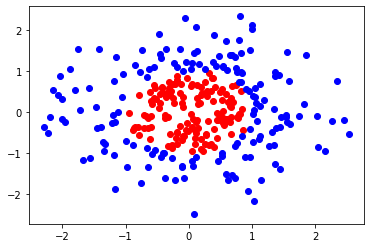

In [11]:
# todas filas y hasta la columna -1
X = data.iloc[:, :-1].values
# La ultima fila
y = data.iloc[:, -1].values

color = ['r', 'b']
for i, c in enumerate(color):
    # Separamos nuestro conjunto rojos y azules (0 y 1)
    regs = y == i
    x1 = X[regs][:,0]
    x2 = X[regs][:,1]
    plt.scatter(x1, x2, c=c, label='Clase' + str(i))
    

Este conjunto de datos no es separables por una recta. Aqui el perceptron no funcionara.

El de regresion logistica lo hara, pero con algunos ajustes, los datos de entrenamiento estara elevadas al cuadrado.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
modelo = LogisticRegression()
modelo.fit(X_train ** 2, y_train)

# Hacemos lo mismoq que hicimos en la resta
# Elipse = a * x1 ** 2  + b*x2 ** 2 + c = 0
# x2 = +/- sqrt(c + a * x1**2 / b) 
# intercept_ es igual a la ordenada al origen

theta = [*modelo.intercept_, *modelo.coef_[0]]
#c, a, b
theta 

[-4.271400874214658, 3.909008911983132, 3.966622211360945]

In [14]:
modelo.intercept_


array([-4.27140087])

In [15]:
# modelo.coef_
print(*modelo.coef_)

[3.90900891 3.96662221]


1.045326200375012


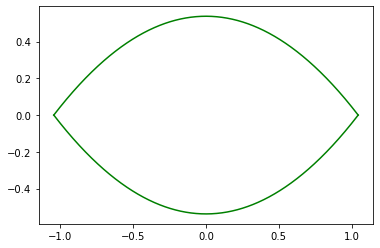

In [16]:
# Proporcion de nuestra elipse
lim = np.sqrt(abs(theta[0] / theta[1]))
print(lim)

x1 = np.linspace(-lim, lim, 1000)
# Positiva
x2 = ((theta[0] + theta[1] * x1 ** 2 ) / (theta[2])) ** 1/2
# Negativa
x3 = -x2

plt.plot(x1, x2, 'g')
plt.plot(x1, x3, 'g')

### Regresión Logística para separar elipses

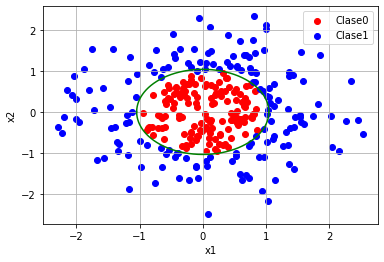

In [20]:
lim = np.sqrt(abs(theta[0] / theta[1]))

x1 = np.linspace(-lim, lim, 10000)
x2 = ((theta[0] + theta[1] * x1 ** 2) / (-theta[2])) ** (1/2)
x3 = -x2

plt.plot(x1, x2, 'g')
plt.plot(x1, x3, 'g')
color = ['r', 'b']

for i, c in enumerate(color):
    regs = y == i
    x1 = X[regs][:,0]
    x2 = X[regs][:,1]
    plt.scatter(x1, x2, c=c, label='Clase' + str(i))
    
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
    